# 5th Weekend Assignment: Data Manipulation with Pandas, NumPy, and Matplotlib
**Name:** Mudasir Sohail  
**Date:** 27th October 2025  
**Dataset Source:** [Mental health and social media balance](https://www.kaggle.com/datasets/prince7489/mental-health-and-social-media-balance-dataset?)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
df = pd.read_csv('Mental_Health_and_Social_Media_Balance_Dataset.csv')

# Displaying first 4 rows
df.head(4)

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0


In [25]:
# Check basic info
# Dataset information
df.info()

# Basic statistical summary
df.describe(include='all')

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64

In [26]:
# Fill missing numeric values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Fill missing object values with mode
for column in df.select_dtypes(include='object').columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Verifying again
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64

In [27]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)',
       'Sleep_Quality(1-10)', 'Stress_Level(1-10)',
       'Days_Without_Social_Media', 'Exercise_Frequency(week)',
       'Social_Media_Platform', 'Happiness_Index(1-10)'],
      dtype='object')

In [28]:
df.columns

# Example: Calculate average daily screen time
avg_screen_time = df['Daily_Screen_Time(hrs)'].mean()
print("Average Daily Screen Time:", round(avg_screen_time, 2), "hours")

# Add a new column showing whether a person is above or below average usage
df['Usage Level'] = np.where(df['Daily_Screen_Time(hrs)'] > avg_screen_time,
                             'High Usage', 'Low Usage')

# Count high vs low usage
df['Usage Level'].value_counts()

# Group by age group or gender to analyze patterns
age_usage = df.groupby('Age')['Daily_Screen_Time(hrs)'].mean()
print(age_usage)

Average Daily Screen Time: 5.53 hours
Age
16    5.188235
17    6.017647
18    4.862500
19    6.127273
20    5.357143
21    4.436364
22    5.569231
23    4.738889
24    5.692857
25    6.511111
26    6.316667
27    5.694737
28    5.572727
29    5.108333
30    5.618182
31    5.700000
32    6.141667
33    6.180000
34    5.218750
35    5.891667
36    5.775000
37    4.660000
38    5.700000
39    5.400000
40    6.061111
41    5.065000
42    6.354545
43    4.945455
44    5.006250
45    5.633333
46    6.030000
47    5.242857
48    6.095652
49    5.737500
Name: Daily_Screen_Time(hrs), dtype: float64


C:\Users\MUDASIR SOHAIL\AppData\Local\Temp\ipykernel_2868\4246405548.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Usage Level', data=df, palette='coolwarm')


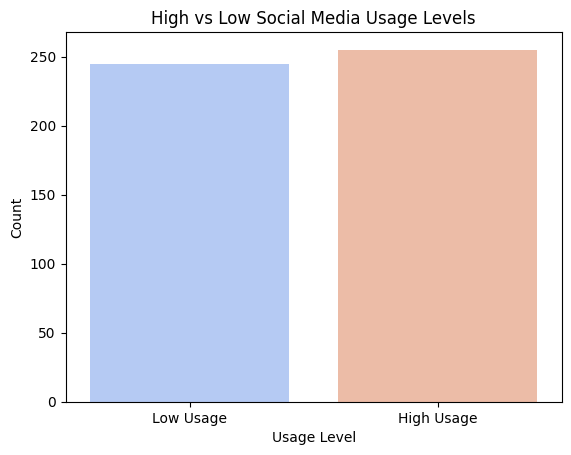

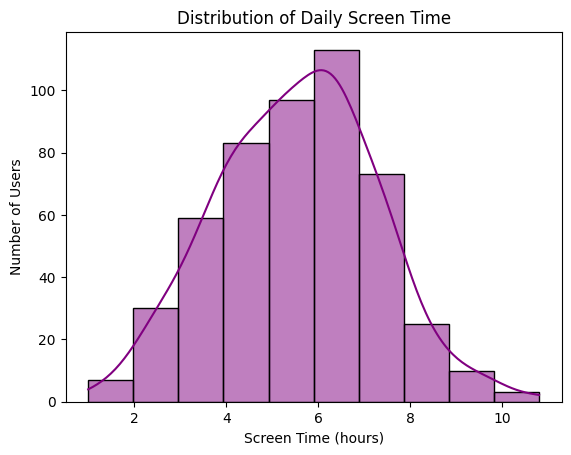

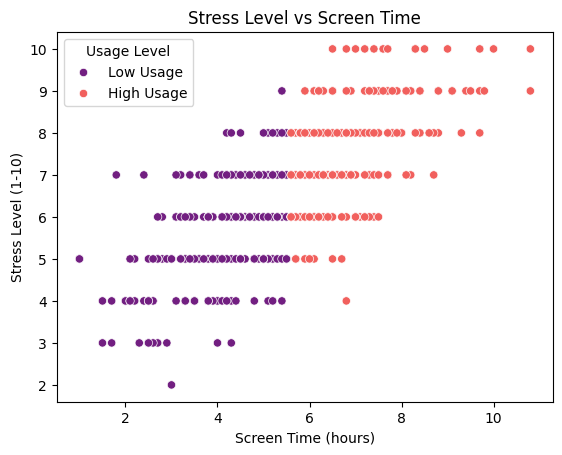

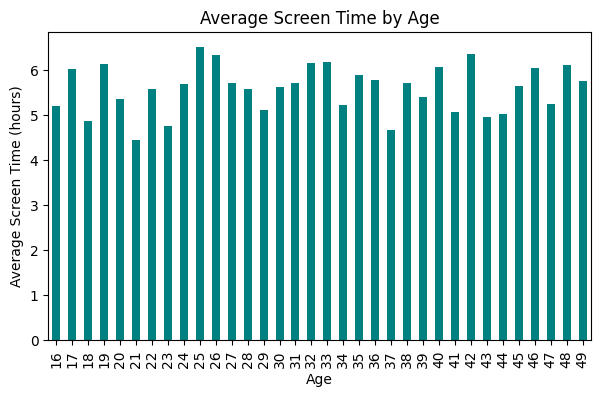

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart - High vs Low usage
sns.countplot(x='Usage Level', data=df, palette='coolwarm')
plt.title('High vs Low Social Media Usage Levels')
plt.xlabel('Usage Level')
plt.ylabel('Count')
plt.show()

# Distribution of Screen Time
sns.histplot(df['Daily_Screen_Time(hrs)'], bins=10, kde=True, color='purple')
plt.title('Distribution of Daily Screen Time')
plt.xlabel('Screen Time (hours)')
plt.ylabel('Number of Users')
plt.show()

# Relationship between Stress Level and Screen Time
sns.scatterplot(x='Daily_Screen_Time(hrs)', 
                y='Stress_Level(1-10)', 
                data=df, 
                hue='Usage Level', 
                palette='magma')
plt.title('Stress Level vs Screen Time')
plt.xlabel('Screen Time (hours)')
plt.ylabel('Stress Level (1-10)')
plt.show()

# Average screen time by age group
age_usage = df.groupby('Age')['Daily_Screen_Time(hrs)'].mean()
age_usage.plot(kind='bar', color='teal', figsize=(7,4))
plt.title('Average Screen Time by Age')
plt.xlabel('Age')
plt.ylabel('Average Screen Time (hours)')
plt.show()


In [30]:
# Useing NumPy to find percentage of people with above average stress
above_avg_stress = np.mean(df['Stress_Level(1-10)'] > df['Stress_Level(1-10)'].mean()) * 100
print(f"Percentage of people with above-average stress: {above_avg_stress:.2f}%")


Percentage of people with above-average stress: 54.40%
